## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Upload Data Base

In [2]:
df_ord = pd.read_csv(r'base_publicaciones.csv')

In [3]:
df_ord.shape

(869470, 10)

In [4]:
df_ord.columns

Index(['ORD_ORDER_ID', 'ITE_ITEM_ID', 'CTLG_PROD_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [5]:
df_ord.head()

,ORD_ORDER_ID,ITE_ITEM_ID,CTLG_PROD_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
0,4577317619,1718794438,10608114,10.66,0,0,0,0,0.0,0.0
1,4542724158,1855945942,15305518,20.32,0,1,0,0,0.0,0.0
2,4603385249,1899937971,6078534,3.33,0,1,0,0,0.0,0.0
3,4588423792,1658897376,14214635,34.45,0,1,0,0,0.0,0.0
4,4546930678,1743613950,15786116,23.54,0,1,0,0,0.0,0.0


In [6]:
df_ord.dtypes

ORD_ORDER_ID                int64
ITE_ITEM_ID                 int64
CTLG_PROD_ID                int64
ITE_BASE_CURRENT_PRICE    float64
flag_bad_user               int64
is_buybox                   int64
has_bpp                     int64
has_claim_seller            int64
is_refund                 float64
bpp_cashout_final         float64
dtype: object

## Describe of the prices of the products

In [7]:
df_prod = df_ord[['CTLG_PROD_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE']]

In [8]:
df_prod.sample(5)

,CTLG_PROD_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE
263499,17459951,1851851511,301.14
454131,16951105,1696616366,190.21
551744,11547163,1798883481,5.60
230037,16211882,1718964196,225.48
171475,16479924,1750759153,326.64


In [9]:
df_prod.shape

(869470, 3)

In [10]:
gb=df_prod.groupby(['CTLG_PROD_ID'])
df_des=gb['ITE_BASE_CURRENT_PRICE'].describe()
df_des

,count,mean,std,min,25%,50%,75%,max
CTLG_PROD_ID,,,,,,,,
633,2.0,47.590000,1.183697e+01,39.22,43.4050,47.590,51.7750,55.96
5020,22.0,44.903636,4.364103e+00,42.09,42.5025,44.020,44.4025,57.98
802465,51.0,87.916471,6.482665e+01,7.83,7.8300,133.770,140.2100,156.84
802499,7.0,47.891429,1.512552e+00,47.02,47.0200,47.080,48.1650,50.77
802500,2.0,63.605000,1.248043e+01,54.78,59.1925,63.605,68.0175,72.43
...,...,...,...,...,...,...,...,...
18185023,4.0,88.860000,4.180000e+00,86.77,86.7700,86.770,88.8600,95.13
18186809,3.0,120.853333,1.144490e+01,109.22,115.2300,121.240,126.6700,132.10
18209455,40.0,588.700000,4.605405e-13,588.70,588.7000,588.700,588.7000,588.70


## Drop rows with NaN std

In [11]:
countNaN = df_des['std'].isna().sum()
countNaN

1073

In [12]:
df_des.dropna(subset = ['std'], inplace=True)

In [13]:
countNaN = df_des['std'].isna().sum()
countNaN

0

## Reset the index

In [14]:
df_des=df_des.reset_index()

In [15]:
df_des.head()

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max
0,633,2.0,47.590000,11.836968,39.22,43.4050,47.590,51.7750,55.96
1,5020,22.0,44.903636,4.364103,42.09,42.5025,44.020,44.4025,57.98
2,802465,51.0,87.916471,64.826648,7.83,7.8300,133.770,140.2100,156.84
3,802499,7.0,47.891429,1.512552,47.02,47.0200,47.080,48.1650,50.77
4,802500,2.0,63.605000,12.480435,54.78,59.1925,63.605,68.0175,72.43


In [16]:
df_des.shape

(8482, 9)

## Join the DFs by Product ID

In [17]:
df = pd.merge(left = df_des, right = df_ord,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [18]:
df.shape

(868397, 18)

In [19]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [20]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
639511,15984003,4690.0,60.440322,4.632960,46.25,56.67,60.48,62.75,158.68,4583574292,1876749071,68.70,0,1,0,0,0.0,0.0
793182,16926684,2366.0,174.970359,20.877237,155.27,168.62,168.62,168.62,273.36,4565385064,1740839377,168.62,0,0,0,0,0.0,0.0
328646,14618022,514.0,21.144942,0.561384,20.71,21.10,21.10,21.10,27.46,4576231301,1604028628,21.10,0,1,0,0,0.0,0.0
788895,16602514,1276.0,35.271309,0.799624,24.74,35.28,35.28,35.28,43.78,4583241541,1868847103,35.28,0,1,0,0,0.0,0.0
523848,15707806,450.0,74.313356,2.084107,67.18,74.40,74.40,74.40,104.12,4542054221,1680978047,74.40,0,1,0,0,0.0,0.0


## Order weight on products

In [21]:
df['weight'] = 1/df[['count']]

In [22]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight
41188,6085450,821.0,49.351157,5.007336,27.45,46.88,48.76,50.10,88.26,4600343371,1891287008,48.71,0,1,0,0,0.0,0.0,0.001218
729374,16175433,924.0,23.905606,0.734499,19.55,23.56,23.56,23.56,25.32,4537147444,1517853929,25.32,0,0,0,0,0.0,0.0,0.001082
591963,15946508,2665.0,227.914435,26.074479,187.22,209.47,218.48,243.28,334.02,4579767707,1647423185,243.28,0,1,0,0,0.0,0.0,0.000375
397273,15245949,814.0,14.333084,1.604944,11.76,11.76,15.31,15.31,17.63,4601109700,1116032739,11.76,0,0,0,0,0.0,0.0,0.001229
270103,12398222,335.0,6.520597,3.637707,1.89,3.91,5.71,8.13,19.55,4545615634,1849309168,8.13,0,1,0,0,0.0,0.0,0.002985


In [23]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight'],
      dtype='object')

## Bad orders

In [24]:
df['bad_order'] = df.apply(lambda x: 1 if x['flag_bad_user'] == 1 or x['has_bpp'] == 1 or x['has_claim_seller'] == 1 or x['is_refund'] == 1 or x['bpp_cashout_final'] > 0 else 0, axis=1)


In [25]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order
663980,16033514,851.0,99.009847,11.710891,89.90,95.51,95.51,102.60,172.24,4539827509,1870076771,89.90,0,1,0,0,0.0,0.0,0.001175,0
566437,15809302,511.0,298.834599,24.380079,225.60,291.51,291.71,298.12,463.49,4542561227,1871152426,298.12,0,1,0,0,0.0,0.0,0.001957,0
315942,14421011,2137.0,23.066121,1.524784,17.03,22.22,22.53,23.86,37.54,4579407173,1808532925,22.91,0,1,0,0,0.0,0.0,0.000468,0
19633,6066981,122.0,12.419262,2.232325,11.71,11.71,11.71,11.71,21.87,4602066214,1525979523,11.71,0,1,0,0,0.0,0.0,0.008197,0
595958,15946510,955.0,227.073099,40.062869,129.03,190.72,225.48,254.99,305.71,4568083031,1876278720,195.20,0,1,0,0,0.0,0.0,0.001047,0


In [26]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order'],
      dtype='object')

# Base on the Price_Range

## Create columns flag low_price for those items with price below the 25%

In [27]:
df['Low25_Price'] = df.apply(lambda x: 1 if x['25%'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create columns flag middle_price for items with price below the 75% and over the  25%

In [28]:
df['Middle_Price'] = df.apply(lambda x: 1 if x['75%'] >= x['ITE_BASE_CURRENT_PRICE'] and x['25%'] <= x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)


## Create column flag high_price for those items with price over the 75%

In [29]:
df['High75_Price'] = df.apply(lambda x: 1 if x['75%'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag price_range

In [30]:
df['Price_Range'] = df.apply(lambda x:'low_25' if x['Low25_Price']== 1 else('high_75' if  x['High75_Price']==1  else 'middle'),axis=1)


In [31]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'is_buybox', 'has_bpp', 'has_claim_seller',
       'is_refund', 'bpp_cashout_final', 'weight', 'bad_order', 'Low25_Price',
       'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [32]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,weight,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
266988,11998125,316.0,85.823829,4.118917,63.18,84.13,84.13,90.01,90.01,4580511228,...,0,0,0.0,0.0,0.003165,0,0,1,0,middle
147416,6504488,320.0,15.482906,1.727967,13.83,14.92,15.42,15.42,23.32,4559211974,...,0,0,0.0,0.0,0.003125,0,0,1,0,middle
124960,6408981,17962.0,53.589554,6.892285,34.07,50.64,52.02,54.17,375.73,4583018090,...,0,0,0.0,0.0,0.000056,0,0,1,0,middle
322526,14548567,94.0,21.981596,2.502918,20.92,20.92,20.92,21.30,32.37,4575174670,...,0,0,0.0,0.0,0.010638,0,0,1,0,middle
64497,6186903,2475.0,26.817006,10.231652,20.63,23.84,25.54,27.11,223.60,4568449831,...,0,0,0.0,0.0,0.000404,0,0,0,1,high_75


## Distribution Bad Orders

In [33]:
df_1=df[['Price_Range','bad_order','ORD_ORDER_ID']]

In [34]:
gb1=df_1.groupby(['Price_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,120675,140534,85.9
1,high_75,1,19859,140534,14.1
2,low_25,0,100553,126987,79.2
3,low_25,1,26434,126987,20.8
4,middle,0,523584,600876,87.1
5,middle,1,77292,600876,12.9


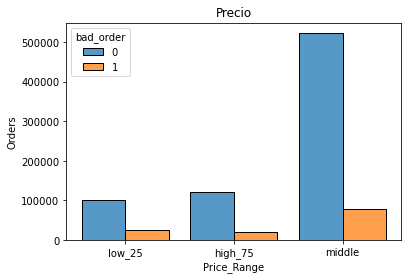

In [35]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [36]:
df_1=df[['Price_Range','flag_bad_user','ORD_ORDER_ID']]

In [37]:
gb1=df_1.groupby(['Price_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,136138,140534,96.9
1,high_75,1,4396,140534,3.1
2,low_25,0,119663,126987,94.2
3,low_25,1,7324,126987,5.8
4,middle,0,582734,600876,97.0
5,middle,1,18142,600876,3.0


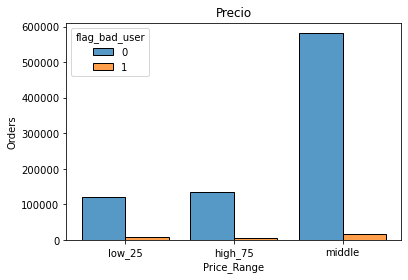

In [38]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [39]:
df_1=df[['Price_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['Price_Range','has_co','ORD_ORDER_ID']]

<ipython-input-39-239d2c268fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [40]:
gb1=df_1.groupby(['Price_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,139690,140534,99.4
1,high_75,1,844,140534,0.6
2,low_25,0,125609,126987,98.9
3,low_25,1,1378,126987,1.1
4,middle,0,597099,600876,99.4
5,middle,1,3777,600876,0.6


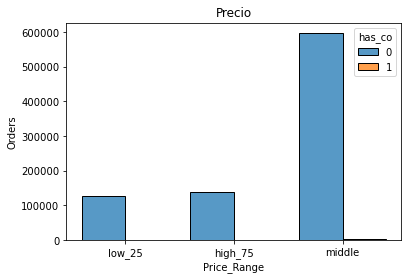

In [41]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [42]:
df_1=df[['Price_Range','has_claim_seller','ORD_ORDER_ID']]

In [43]:
gb1=df_1.groupby(['Price_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,127238,140534,90.5
1,high_75,1,13296,140534,9.5
2,low_25,0,110606,126987,87.1
3,low_25,1,16381,126987,12.9
4,middle,0,551372,600876,91.8
5,middle,1,49504,600876,8.2


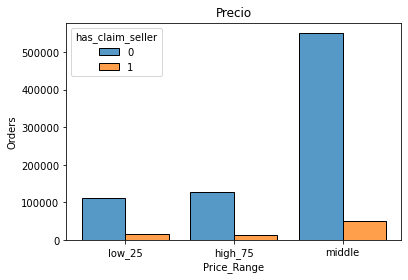

In [44]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [45]:
df_1=df[['Price_Range','is_refund','ORD_ORDER_ID']]

In [46]:
gb1=df_1.groupby(['Price_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0.0,127272,140533,90.6
1,high_75,1.0,13261,140533,9.4
2,low_25,0.0,109284,126978,86.1
3,low_25,1.0,17694,126978,13.9
4,middle,0.0,551477,600874,91.8
5,middle,1.0,49397,600874,8.2


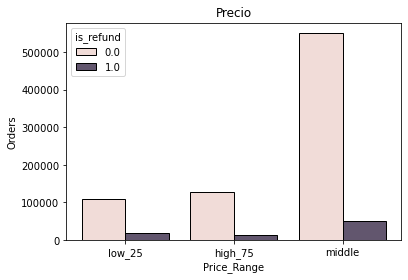

In [47]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Create DF STD

In [106]:
df_std = df_des[['CTLG_PROD_ID','50%']]
df_std['STDx1'] = df_des['50%'] - df_des['std']
df_std['STDx1.25'] = df_des['50%'] - (df_des['std']*1.25)
df_std['STDx1.5'] = df_des['50%'] - (df_des['std']*1.5)
df_std['STDx1.75'] = df_des['50%'] - (df_des['std']*1.75)
df_std['STDx2'] = df_des['50%'] - (df_des['std']*2)
df_std['STDx2.25'] = df_des['50%'] - (df_des['std']*2.25)
df_std['STDx2.5'] = df_des['50%'] - (df_des['std']*2.5)
df_std['STDx2.75'] = df_des['50%'] - (df_des['std']*2.75)
df_std['STDx3'] = df_des['50%'] - (df_des['std']*3)
df_std=df_std.round(decimals=2)

<ipython-input-106-6eefd10cf30f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1'] = df_des['50%'] - df_des['std']
<ipython-input-106-6eefd10cf30f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1.25'] = df_des['50%'] - (df_des['std']*1.25)
<ipython-input-106-6eefd10cf30f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [107]:
df_std.sample(5)

,CTLG_PROD_ID,50%,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
7099,16050680,1861.31,1861.31,1861.31,1861.31,1861.31,1861.31,1861.31,1861.31,1861.31,1861.31
8219,17455797,1648.72,1622.35,1615.76,1609.17,1602.57,1595.98,1589.39,1582.80,1576.20,1569.61
7301,16094851,21.70,21.17,21.03,20.90,20.77,20.63,20.50,20.37,20.23,20.10
4318,15149568,887.08,858.58,851.46,844.34,837.21,830.09,822.96,815.84,808.72,801.59
4464,15203214,523.59,490.49,482.21,473.94,465.66,457.39,449.11,440.84,432.56,424.29


# Base on the STD_Range

In [ ]:
df['STDx2'] = df[['std']]*2

## Create column flag below 2 STD

In [ ]:
df['media-2std'] = df['50%'] - df['STDx2']
df['Low_2STD'] = df.apply(lambda x: 1 if x['media-2std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag over 2 STD

In [ ]:
df['media+2std'] = df['50%'] + df['STDx2']
df['High_2STD'] = df.apply(lambda x: 1 if x['media+2std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag STD_range

In [ ]:
df['STD_Range'] = df.apply(lambda x:'low_2STD' if x['Low_2STD']== 1 else('high_2STD' if  x['High_2STD']==1  else 'middle_2STD'),axis=1)


In [ ]:
df.columns

In [ ]:
df.sample(5)

## Distribution Bad Orders

In [37]:
df_1=df[['STD_Range','bad_order','ORD_ORDER_ID']]

In [38]:
gb1=df_1.groupby(['STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,17069,20046,85.1
1,high_2STD,1,2977,20046,14.9
2,low_2STD,0,3263,5310,61.5
3,low_2STD,1,2047,5310,38.5
4,middle_2STD,0,724480,843041,85.9
5,middle_2STD,1,118561,843041,14.1


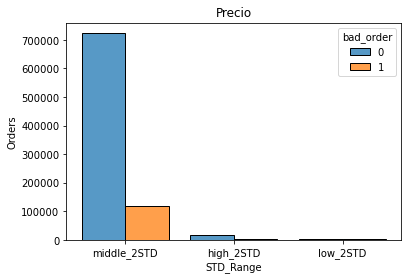

In [39]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [40]:
df_1=df[['STD_Range','flag_bad_user','ORD_ORDER_ID']]

In [41]:
gb1=df_1.groupby(['STD_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,19547,20046,97.5
1,high_2STD,1,499,20046,2.5
2,low_2STD,0,4980,5310,93.8
3,low_2STD,1,330,5310,6.2
4,middle_2STD,0,814008,843041,96.6
5,middle_2STD,1,29033,843041,3.4


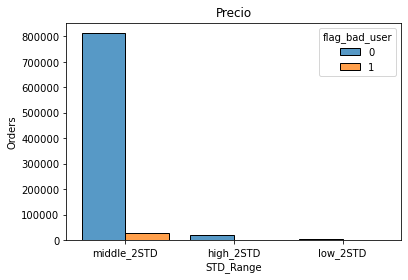

In [42]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [43]:
df_1=df[['STD_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['STD_Range','has_co','ORD_ORDER_ID']]

<ipython-input-43-080048337619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [44]:
gb1=df_1.groupby(['STD_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,19963,20046,99.6
1,high_2STD,1,83,20046,0.4
2,low_2STD,0,5201,5310,97.9
3,low_2STD,1,109,5310,2.1
4,middle_2STD,0,837234,843041,99.3
5,middle_2STD,1,5807,843041,0.7


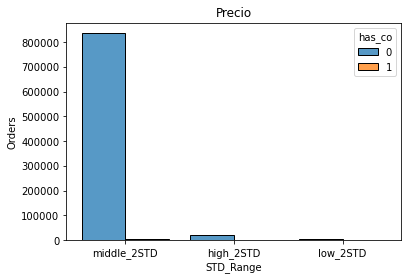

In [45]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [46]:
df_1=df[['STD_Range','has_claim_seller','ORD_ORDER_ID']]

In [47]:
gb1=df_1.groupby(['STD_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0,17889,20046,89.2
1,high_2STD,1,2157,20046,10.8
2,low_2STD,0,3807,5310,71.7
3,low_2STD,1,1503,5310,28.3
4,middle_2STD,0,767520,843041,91.0
5,middle_2STD,1,75521,843041,9.0


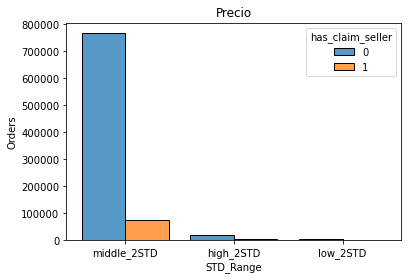

In [48]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [49]:
df_1=df[['STD_Range','is_refund','ORD_ORDER_ID']]

In [50]:
gb1=df_1.groupby(['STD_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['STD_Range','ORD_ORDER_ID']].groupby(['STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='STD_Range', right_on='STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,STD_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_2STD,0.0,17999,20046,89.8
1,high_2STD,1.0,2047,20046,10.2
2,low_2STD,0.0,3531,5309,66.5
3,low_2STD,1.0,1778,5309,33.5
4,middle_2STD,0.0,766503,843030,90.9
5,middle_2STD,1.0,76527,843030,9.1


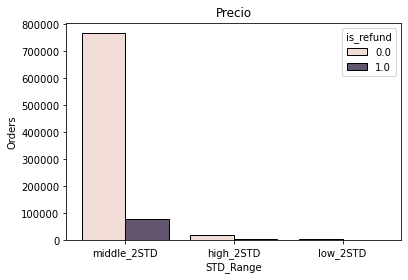

In [51]:
sns.histplot(
            data=df_1,
            x="STD_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Export the products IDs

In [ ]:
#ID=df['CTLG_PROD_ID']
#ID.to_csv(r'products_id.csv', index = False)

In [ ]:
#LAMBDA CON AND
#df_ratios['extremos']= df_ratios.apply(lambda x: 'caso1' if x['ratio_recla_1m']> 0.3 and x['ratio_cashout_1m']> 0.3 and x['ratio_ref_1m']> 0.3 and x['ratio_claims_1m']> 0.3 else 'no',axis=1)


In [ ]:
#LAMDA CON IF ANIDADO
#df['adicionales']= df.apply(lambda x: 'caso1' if x['gmv_90d']<= 0 else('caso2' if  x['gmv_30d']<=0  else 'no'),axis=1)
